In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from pydataset import data
import seaborn as sns
import math
import env
user = env.user
host = env.host
password = env.password

import os
os.path.exists('env.py')

def get_db_url(db, env_file=os.path.exists('env.py')):
    if env_file:
        user, password, host = (env.user, env.password, env.host)
        return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [4]:
# In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

df_iris = data('iris')
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [5]:
# print the first 3 rows

df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [6]:
# print the number of rows and columns (shape)

df_iris.shape

(150, 5)

In [7]:
# print the column names

df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [8]:
# print the data type of each column

df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [9]:
# print the summary statistics for each of the numeric variables

df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# Read the data from this google sheet into a dataframe, df_google.

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)


In [19]:
# print the first 3 rows
df_google.head(3)

In [10]:
# print the number of rows and columns

df_google.shape

(891, 12)

In [11]:
# print the column names

df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# print the data type of each column

df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
# print the summary statistics for each of the numeric variables
 
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# print the unique values for each of your categorical variables

df_google.PassengerId.value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [15]:
df_google.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
df_google.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
df_google.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
30.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
35.00    18
27.00    18
26.00    18
16.00    17
31.00    17
20.00    15
34.00    15
33.00    15
23.00    15
39.00    14
40.00    13
17.00    13
42.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
44.00     9
48.00     9
47.00     9
54.00     8
9.00      8
1.00      7
51.00     7
14.00     6
52.00     6
37.00     6
49.00     6
41.00     6
3.00      6
58.00     5
15.00     5
43.00     5
62.00     4
56.00     4
5.00      4
11.00     4
60.00     4
8.00      4
6.00      3
46.00     3
61.00     3
65.00     3
7.00      3
10.00     2
64.00     2
13.00     2
63.00     2
30.50     2
57.00     2
70.00     2
0.75      2
71.00     2
59.00     2
0.83      2
40.50     2
55.00     2
32.50     2
28.50     2
45.50     2
34.50     1
0.42      1
0.67      1
66.00     1
24.50     1
80.00     1
20.50     1
53.00     1
14.50     1
70.50     1
12.00     1
36.5

In [18]:
df_google.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
df_google.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [20]:
df_google.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [21]:
# Download the previous exercise's file into an excel (File → Download → Microsoft Excel). 
# Read the downloaded file into a dataframe named df_excel.

df_excel = pd.read_excel('train.xlsx')

In [22]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)
df_excel_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.00,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.00,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1.0,0.0,113803.0,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.00,0.0,0.0,373450.0,8.0500,NaN,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,NaN,0.0,0.0,330877.0,8.4583,NaN,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.00,0.0,0.0,17463.0,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.00,3.0,1.0,349909.0,21.0750,NaN,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0.0,2.0,347742.0,11.1333,NaN,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1.0,0.0,237736.0,30.0708,NaN,C


In [23]:
# print the number of rows of your original dataframe

df_excel.shape[0]

891

In [24]:
# print the first 5 column names

x = [0,1,2,3,4]
df_excel.columns[x]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [25]:
# print the column names that have a data type of object

df_excel.dtypes[df_excel.dtypes == object]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [26]:
# compute the range for each of the numeric variables.

print(df_excel.PassengerId.min(), df_excel.PassengerId.max())
print(df_excel.Survived.min(), df_excel.Survived.max())
print(df_excel.Pclass.min(), df_excel.Pclass.max())
print(df_excel.Age.min(), df_excel.Age.max())
print(df_excel.SibSp.min(), df_excel.SibSp.max())
print(df_excel.Parch.min(), df_excel.Parch.max())
print(df_excel.Fare.min(), df_excel.Fare.max())

1.0 891.0
0.0 1.0
1.0 3.0
0.42 80.0
0.0 8.0
0.0 6.0
0.0 512.3292


## Using the Iris Data:

In [23]:
# Use the function defined in acquire.py to load the iris data.

import acquire
iris_df = acquire.get_iris_data()
iris_df

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2
5,1,setosa,6,5.4,3.9,1.7,0.4
6,1,setosa,7,4.6,3.4,1.4,0.3
7,1,setosa,8,5.0,3.4,1.5,0.2
8,1,setosa,9,4.4,2.9,1.4,0.2
9,1,setosa,10,4.9,3.1,1.5,0.1


In [24]:
# Rename the species_name column to just species.

iris_df.rename(columns={'species_name': 'species'}, inplace=True)

In [25]:
# Create dummy variables of the species name and concatenate onto the iris dataframe. 
# (This is for practice, we don't always have to encode the target, but if we used 
# species as a feature, we would need to encode it).

dummy_iris_df = pd.get_dummies(iris_df[['species']])
iris_df = pd.concat([iris_df, dummy_iris_df], axis=1)

In [26]:
iris_df

,species_id,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,1,setosa,1,5.1,3.5,1.4,0.2,1,0,0
1,1,setosa,2,4.9,3.0,1.4,0.2,1,0,0
2,1,setosa,3,4.7,3.2,1.3,0.2,1,0,0
3,1,setosa,4,4.6,3.1,1.5,0.2,1,0,0
4,1,setosa,5,5.0,3.6,1.4,0.2,1,0,0
5,1,setosa,6,5.4,3.9,1.7,0.4,1,0,0
6,1,setosa,7,4.6,3.4,1.4,0.3,1,0,0
7,1,setosa,8,5.0,3.4,1.5,0.2,1,0,0
8,1,setosa,9,4.4,2.9,1.4,0.2,1,0,0
9,1,setosa,10,4.9,3.1,1.5,0.1,1,0,0


In [27]:
# Create a function named prep_iris that accepts the untransformed iris data, 
# and returns the data with the transformations above applied.

def prep_iris(iris_df):
    iris_df.rename(columns={'species_name': 'species'}, inplace=True)
    dummy_iris_df = pd.get_dummies(iris_df[['species']])
    iris_df = pd.concat([iris_df, dummy_iris_df], axis=1)
    return iris_df


In [32]:
prep_iris(iris_df)

,species_id,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica,species_setosa,species_versicolor,species_virginica
0,1,setosa,1,5.1,3.5,1.4,0.2,1,0,0,1,0,0
1,1,setosa,2,4.9,3.0,1.4,0.2,1,0,0,1,0,0
2,1,setosa,3,4.7,3.2,1.3,0.2,1,0,0,1,0,0
3,1,setosa,4,4.6,3.1,1.5,0.2,1,0,0,1,0,0
4,1,setosa,5,5.0,3.6,1.4,0.2,1,0,0,1,0,0
5,1,setosa,6,5.4,3.9,1.7,0.4,1,0,0,1,0,0
6,1,setosa,7,4.6,3.4,1.4,0.3,1,0,0,1,0,0
7,1,setosa,8,5.0,3.4,1.5,0.2,1,0,0,1,0,0
8,1,setosa,9,4.4,2.9,1.4,0.2,1,0,0,1,0,0
9,1,setosa,10,4.9,3.1,1.5,0.1,1,0,0,1,0,0


In [28]:
# Use the function defined in acquire.py to load the Titanic data.

titanic_df = acquire.get_titanic_data()
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [29]:
# Drop any unnecessary, unhelpful, or duplicated columns.

missing = titanic_df.isnull().sum()
missing[missing > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [30]:
# embarked == embark_town, so remove embarked & keep embark_town
# class == pclass, so remove class & keep pclass (already numeric)
# drop deck...way too many missing values
# fill embark_town with most common value ('Southampton')
# drop age column
# encode or create dummy vars for sex & embark_town.

In [31]:
titanic_df = titanic_df.drop_duplicates()
titanic_df.shape

(891, 13)

In [32]:
cols_to_drop = ['deck', 'embarked', 'class', 'age']
titanic_df = titanic_df.drop(columns=cols_to_drop)
titanic_df.shape

(891, 9)

In [33]:
titanic_df['embark_town'] = titanic_df.embark_town.fillna(value='Southampton')

In [34]:
# Encode the categorical columns. Create dummy variables of the categorical columns and 
# concatenate them onto the dataframe.

dummy_titanic_df = pd.get_dummies(titanic_df[['sex','embark_town']], dummy_na=False, drop_first=[True, False])
titanic_df = pd.concat([titanic_df, dummy_titanic_df], axis=1)
titanic_df.head(1)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.25,Southampton,0,1,0,1


In [35]:
# Create a function named prep_titanic that accepts the raw titanic data, and returns the 
# data with the transformations above applied.

def prep_titanic(titanic_df):
    titanic_df = titanic_df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    titanic_df = titanic_df.drop(columns=cols_to_drop)
    titanic_df['embark_town'] = titanic_df.embark_town.fillna(value='Southampton')
    dummy_titanic_df = pd.get_dummies(titanic_df[['sex','embark_town']], drop_first=[True, False])
    titanic_df = pd.concat([titanic_df, dummy_titanic_df], axis=1)
    return titanic_df

In [45]:
prep_titanic(titanic_df)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


In [36]:
# Using the Telco dataset
# Use the function defined in acquire.py to load the Telco data.

telco_df = acquire.get_telco_data()
telco_df

,internet_service_type_id,customer_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,monthly_charges,total_charges,churn,contract_type,contract_type_id.1,paperless_billing.1,payment_type_id.1,monthly_charges.1,total_charges.1,internet_service_type
0,1,0002-ORFBO,2,Female,0,Yes,Yes,9,Yes,No,...,65.60,593.3,No,One year,2,Yes,2,65.60,593.3,DSL
1,1,0003-MKNFE,1,Male,0,No,No,9,Yes,Yes,...,59.90,542.4,No,Month-to-month,1,No,2,59.90,542.4,DSL
2,2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,...,73.90,280.85,Yes,Month-to-month,1,Yes,1,73.90,280.85,Fiber optic
3,2,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,...,98.00,1237.85,Yes,Month-to-month,1,Yes,1,98.00,1237.85,Fiber optic
4,2,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,...,83.90,267.4,Yes,Month-to-month,1,Yes,2,83.90,267.4,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,9282-IZGQK,1,Female,0,No,No,1,Yes,Yes,...,85.00,85,Yes,Month-to-month,1,Yes,1,85.00,85,Fiber optic
7039,1,9462-MJUAW,1,Male,0,No,No,4,Yes,Yes,...,50.40,206.6,Yes,Month-to-month,1,No,2,50.40,206.6,DSL
7040,1,9705-ZJBCG,2,Female,0,Yes,Yes,13,Yes,No,...,54.15,701.05,No,One year,2,No,3,54.15,701.05,DSL
7041,2,9777-IQHWP,3,Male,0,Yes,Yes,64,Yes,Yes,...,93.40,5822.3,No,Two year,3,No,3,93.40,5822.3,Fiber optic


In [37]:
# Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign 
# key columns but keeping the corresponding string values, for example.

missing = telco_df.isnull().sum()
missing

internet_service_type_id    0
customer_id                 0
contract_type_id            0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
payment_type_id             0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
contract_type_id.1          0
paperless_billing.1         0
payment_type_id.1           0
monthly_charges.1           0
total_charges.1             0
internet_service_type       0
dtype: int64

In [38]:
telco_df.shape

(7043, 28)

In [39]:
telco_df.columns

Index(['internet_service_type_id', 'customer_id', 'contract_type_id', 'gender',
       'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'contract_type_id.1',
       'paperless_billing.1', 'payment_type_id.1', 'monthly_charges.1',
       'total_charges.1', 'internet_service_type'],
      dtype='object')

In [40]:
telco_df = telco_df.drop_duplicates()
telco_df.shape

(7043, 28)

In [41]:
cols_to_drop = ['internet_service_type_id', 'contract_type_id', 'payment_type_id']
telco_df = telco_df.drop(columns=cols_to_drop)
telco_df.shape

(7043, 25)

In [42]:
telco_df = telco_df.T.drop_duplicates().T
telco_df.shape

(7043, 22)

In [43]:
telco_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'contract_type_id.1',
       'payment_type_id.1', 'internet_service_type'],
      dtype='object')

In [44]:
telco_df.describe().T

,count,unique,top,freq
customer_id,7043,7043,0002-ORFBO,1
gender,7043,2,Male,3555
senior_citizen,7043,2,0,5901
partner,7043,2,No,3641
dependents,7043,2,No,4933
tenure,7043,73,1,613
phone_service,7043,2,Yes,6361
multiple_lines,7043,3,No,3390
online_security,7043,3,No,3498
online_backup,7043,3,No,3088


In [45]:
telco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,contract_type_id.1,payment_type_id.1,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,No,Yes,65.6,593.3,No,One year,2,2,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,Yes,No,59.9,542.4,No,Month-to-month,1,2,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,Yes,73.9,280.85,Yes,Month-to-month,1,1,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,1,1,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,1,2,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,Female,0,No,No,1,Yes,Yes,No,No,...,No,Yes,Yes,85.0,85,Yes,Month-to-month,1,1,Fiber optic
7039,9462-MJUAW,Male,0,No,No,4,Yes,Yes,No,No,...,No,No,No,50.4,206.6,Yes,Month-to-month,1,2,DSL
7040,9705-ZJBCG,Female,0,Yes,Yes,13,Yes,No,Yes,No,...,No,No,No,54.15,701.05,No,One year,2,3,DSL
7041,9777-IQHWP,Male,0,Yes,Yes,64,Yes,Yes,Yes,No,...,No,Yes,No,93.4,5822.3,No,Two year,3,3,Fiber optic


In [46]:
# Encode the categorical columns. Create dummy variables of the categorical columns 
# and concatenate them onto the dataframe.

dummy_telco_df = pd.get_dummies(telco_df[['gender','contract_type','internet_service_type']], dummy_na=False, drop_first=[True, False, False])
telco_df = pd.concat([telco_df, dummy_telco_df], axis=1)
telco_df.head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,churn,contract_type,contract_type_id.1,payment_type_id.1,internet_service_type,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,No,One year,2,2,DSL,0,1,0,0,0


In [47]:
def prep_telco(telco_df):
    cols_to_drop = ['internet_service_type_id', 'contract_type_id', 'payment_type_id']
    telco_df = telco_df.drop(columns=cols_to_drop)
    telco_df = telco_df.T.drop_duplicates().T
    dummy_telco_df = pd.get_dummies(telco_df[['gender','contract_type','internet_service_type']], dummy_na=False, drop_first=[True, False, False])
    telco_df = pd.concat([telco_df, dummy_telco_df], axis=1)
    return telco_df

In [51]:
prep_telco(telco_df)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,churn,contract_type,contract_type_id.1,payment_type_id.1,internet_service_type,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,No,One year,2,2,DSL,0,1,0,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,Month-to-month,1,2,DSL,1,0,0,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,Yes,Month-to-month,1,1,Fiber optic,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,Yes,Month-to-month,1,1,Fiber optic,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Month-to-month,1,2,Fiber optic,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,Female,0,No,No,1,Yes,Yes,No,No,...,Yes,Month-to-month,1,1,Fiber optic,0,0,0,1,0
7039,9462-MJUAW,Male,0,No,No,4,Yes,Yes,No,No,...,Yes,Month-to-month,1,2,DSL,1,0,0,0,0
7040,9705-ZJBCG,Female,0,Yes,Yes,13,Yes,No,Yes,No,...,No,One year,2,3,DSL,0,1,0,0,0
7041,9777-IQHWP,Male,0,Yes,Yes,64,Yes,Yes,Yes,No,...,No,Two year,3,3,Fiber optic,1,0,1,1,0


In [58]:
# Split your data
# Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.
# Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.
# Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.
# Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [48]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 25% validate, 75% train. 
from sklearn.model_selection import train_test_split

train_iris, test_iris = train_test_split(iris_df, test_size=.2, random_state=123, stratify=iris_df.species)
train_iris, validate_iris = train_test_split(train_iris, test_size=.25, random_state=123, stratify=train_iris.species)
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')

Train: (90, 10)
Validate: (30, 10)
Test: (30, 10)


In [49]:
def split_data_iris(iris_df):
    train_iris, test_iris = train_test_split(iris_df, test_size=.2, random_state=123, stratify=iris_df.species)
    train_iris, validate_iris = train_test_split(train_iris, test_size=.25, random_state=123, stratify=train_iris.species)
    return train_iris, validate_iris, test_iris



In [50]:
def split_data_titanic(titanic_df):
    train_titanic, test_titanic = train_test_split(titanic_df, test_size=.2, random_state=123, stratify=titanic_df.survived)
    train_titanic, validate_titanic = train_test_split(train_titanic, test_size=.25, random_state=123, stratify=train_titanic.survived)
    return train_titanic, validate_titanic, test_titanic


In [51]:
def split_data_telco(telco_df):
    train_telco, test_telco = train_test_split(telco_df, test_size=.2, random_state=123, stratify=telco_df.churn)
    train_telco, validate_telco = train_test_split(train_telco, test_size=.25, random_state=123, stratify=train_telco.churn)
    return train_telco, validate_telco, test_telco



## Tidy Data

In [63]:
# Read the data from the attendance table and calculate an attendance percentage 
# for each student. One half day is worth 50% of a full day, and 10 tardies is 
# equal to one absence.

tidy_data_url = get_db_url('tidy_data')
tidy_data = pd.read_sql('SELECT * FROM attendance;', tidy_data_url)
tidy_data

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [64]:
# Not optimal
tidy_data = tidy_data.replace('A', 0)
tidy_data = tidy_data.replace('P', 1)
tidy_data = tidy_data.replace('T', .9)
tidy_data = tidy_data.replace('H', .5)
tidy_data['Grade'] = tidy_data.sum(axis=1)/8
tidy_data.rename(columns = {'Unnamed: 0':'Name'}, inplace = True)
tidy_data[['Name', 'Grade']].sort_values(by='Name', ascending=True)

/var/folders/vy/hnssqbw53999z9_6dhflqy780000gn/T/ipykernel_2619/465256162.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tidy_data['Grade'] = tidy_data.sum(axis=1)/8


,Name,Grade
2,Billy,0.5250
1,Jane,0.6875
3,John,0.9125
0,Sally,0.7625


In [65]:
tidy_data2 = pd.read_sql('SELECT * FROM attendance;', tidy_data_url)
tidy_data2

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [66]:
tidy_data2.rename(columns = {'Unnamed: 0':'Name'}, inplace = True)
tidy_data2 = tidy_data2.replace('A', 0)
tidy_data2 = tidy_data2.replace('P', 1)
tidy_data2 = tidy_data2.replace('T', .9)
tidy_data2 = tidy_data2.replace('H', .5)
tidy_data2 = tidy_data2.melt(id_vars=['Name'], var_name='Date', value_name='Attendance')

In [67]:
tidy_data2 = tidy_data2.pivot_table(index='Name', columns='Date', values='Attendance')

In [68]:
tidy_data2

Date,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
Name,,,,,,,,
Billy,0.0,0.9,0.0,0.0,0.5,0.9,1.0,0.9
Jane,0.0,1.0,0.9,0.9,0.9,0.9,0.0,0.9
John,1.0,0.9,0.5,1.0,1.0,0.9,1.0,1.0
Sally,1.0,0.9,0.9,0.5,1.0,0.0,0.9,0.9


In [69]:
x = tidy_data2.shape[1]
tidy_data2.sum(axis=1)/x

Name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
dtype: float64

In [70]:
# Read the coffee_levels table.
coffee_levels = pd.read_sql('SELECT * FROM coffee_levels;', tidy_data_url)
coffee_levels

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


In [71]:
# Transform the data so that each carafe is in it's own column.

# Not optimal
coffee_levels_x = coffee_levels.loc[coffee_levels.coffee_carafe=='x']
coffee_levels_y = coffee_levels.loc[coffee_levels.coffee_carafe=='y']
coffee_levels_z = coffee_levels.loc[coffee_levels.coffee_carafe=='z']
coffee_levels_xy = coffee_levels_x.merge(coffee_levels_y, left_on='hour', right_on='hour', how='inner', indicator=True)
coffee_levels_xyz = coffee_levels_xy.merge(coffee_levels_z, left_on='hour', right_on='hour', how='inner')
coffee_levels_xyz = coffee_levels_xyz.drop(columns=['_merge'])
coffee_levels_xyz.rename(columns={'coffee_carafe': 'coffee_carafe_z'}, inplace=True)
coffee_levels_xyz.rename(columns={'coffee_amount': 'coffee_amount_z'}, inplace=True)
coffee_levels_xyz

,hour,coffee_carafe_x,coffee_amount_x,coffee_carafe_y,coffee_amount_y,coffee_carafe_z,coffee_amount_z
0,8,x,0.816164,y,0.189297,z,0.999264
1,9,x,0.451018,y,0.521502,z,0.915990
2,10,x,0.843279,y,0.023163,z,0.144928
3,11,x,0.335533,y,0.235529,z,0.311495
4,12,x,0.898291,y,0.017009,z,0.771947
5,13,x,0.310711,y,0.997464,z,0.398520
6,14,x,0.507288,y,0.058361,z,0.864464
7,15,x,0.215043,y,0.144644,z,0.436364
8,16,x,0.183891,y,0.544676,z,0.280621
9,17,x,0.391560,y,0.594126,z,0.436677


In [72]:
# Better way
coffee_levels_pivot = coffee_levels.pivot_table(index=['hour'], columns='coffee_carafe', values='coffee_amount')
coffee_levels_pivot

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


In [73]:
coffee_levels_pivot.columns.name = ''
coffee_levels_pivot.reset_index(inplace=True)
coffee_levels_pivot.rename(columns={'x': 'coffee_carafe_x'}, inplace=True)
coffee_levels_pivot.rename(columns={'y': 'coffee_carafe_y'}, inplace=True)
coffee_levels_pivot.rename(columns={'z': 'coffee_carafe_z'}, inplace=True)
coffee_levels_pivot

,hour,coffee_carafe_x,coffee_carafe_y,coffee_carafe_z
0,8,0.816164,0.189297,0.999264
1,9,0.451018,0.521502,0.915990
2,10,0.843279,0.023163,0.144928
3,11,0.335533,0.235529,0.311495
4,12,0.898291,0.017009,0.771947
5,13,0.310711,0.997464,0.398520
6,14,0.507288,0.058361,0.864464
7,15,0.215043,0.144644,0.436364
8,16,0.183891,0.544676,0.280621
9,17,0.391560,0.594126,0.436677


In [74]:
# Is this the best shape for the data?

# There is too many observations per row.

In [75]:
# Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

cake_recipes = pd.read_sql('SELECT * FROM cake_recipes;', tidy_data_url)
cake_recipes


,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [76]:
# Tidy the data as necessary.

cake_recipes.rename(columns={'recipe:position': 'recipe_position'}, inplace=True)
cake_recipes_melt = cake_recipes.melt(id_vars='recipe_position', var_name='Degrees')

In [77]:
cake_recipes_melt.rename(columns={'value': 'Tastiness'}, inplace=True)
cake_recipes_melt

,recipe_position,Degrees,Tastiness
0,a:bottom,225,61.738655
1,a:top,225,51.709751
2,b:bottom,225,57.095320
3,b:top,225,82.455004
4,c:bottom,225,96.470207
5,c:top,225,71.306308
6,d:bottom,225,52.799753
7,d:top,225,96.873178
8,a:bottom,250,53.912627
9,a:top,250,52.009735


In [78]:
recipe_position = cake_recipes_melt['recipe_position'].str.split(':', expand=True)

In [79]:
recipe_position.columns = ['recipe', 'position']
recipe_position

,recipe,position
0,a,bottom
1,a,top
2,b,bottom
3,b,top
4,c,bottom
5,c,top
6,d,bottom
7,d,top
8,a,bottom
9,a,top


In [80]:
cake_recipes2 = pd.concat([cake_recipes_melt, recipe_position], axis=1).drop(columns='recipe_position')
cake_recipes2


,Degrees,Tastiness,recipe,position
0,225,61.738655,a,bottom
1,225,51.709751,a,top
2,225,57.095320,b,bottom
3,225,82.455004,b,top
4,225,96.470207,c,bottom
5,225,71.306308,c,top
6,225,52.799753,d,bottom
7,225,96.873178,d,top
8,250,53.912627,a,bottom
9,250,52.009735,a,top


In [81]:
cake_recipes2 = cake_recipes2.pivot_table(index=['recipe', 'position'], columns='Degrees', values='Tastiness')
cake_recipes2


Degrees                225        250        275        300
recipe position                                            
a      bottom    61.738655  53.912627  74.414730  98.786784
       top       51.709751  52.009735  68.576858  50.228470
b      bottom    57.095320  61.904369  61.196980  99.248541
       top       82.455004  95.224151  98.594881  58.169349
c      bottom    96.470207  52.001358  92.893227  65.473084
       top       71.306308  82.795477  92.098049  53.960273
d      bottom    52.799753  58.670419  51.747686  56.183110
       top       96.873178  76.101363  59.571620  50.971626

In [82]:
cake_recipes2.columns.name = ''
cake_recipes2.reset_index(inplace=True)
cake_recipes2

,recipe,position,225,250,275,300
0,a,bottom,61.738655,53.912627,74.414730,98.786784
1,a,top,51.709751,52.009735,68.576858,50.228470
2,b,bottom,57.095320,61.904369,61.196980,99.248541
3,b,top,82.455004,95.224151,98.594881,58.169349
4,c,bottom,96.470207,52.001358,92.893227,65.473084
5,c,top,71.306308,82.795477,92.098049,53.960273
6,d,bottom,52.799753,58.670419,51.747686,56.183110
7,d,top,96.873178,76.101363,59.571620,50.971626


In [83]:
# Which recipe, on average, is the best? recipe b
cake_recipes2_avg = cake_recipes2.groupby(['recipe']).mean()
cake_recipes2_avg.mean(axis=1)

recipe
a    63.922201
b    76.736074
c    75.874748
d    62.864844
dtype: float64

In [84]:
# Which oven temperature, on average, produces the best results? 275

cake_recipes2.mean()

/var/folders/vy/hnssqbw53999z9_6dhflqy780000gn/T/ipykernel_2619/4075317409.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cake_recipes2.mean()



225    71.306022
250    66.577437
275    74.886754
300    66.627655
dtype: float64

In [85]:
# Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

print(cake_recipes2.max(axis=0))
cake_recipes2[['recipe', 'position', '300']].nlargest(1, '300', keep='last')


recipe              d
position          top
225         96.873178
250         95.224151
275         98.594881
300         99.248541
dtype: object


,recipe,position,300
2,b,bottom,99.248541


## Exploratory Analysis

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

In [52]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [53]:
# Acquire, prepare & split your data.
iris_df_url = get_db_url('iris_db')
iris_df = pd.read_sql('SELECT * FROM species JOIN measurements USING(species_id)', iris_df_url)
iris_df = prep_iris(iris_df)
cols_to_drop = ['species_id', 'measurement_id']
iris_df = iris_df.drop(columns=cols_to_drop)
train_iris, validate_iris, test_iris = split_data_iris(iris_df)
iris_df

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0
5,setosa,5.4,3.9,1.7,0.4,1,0,0
6,setosa,4.6,3.4,1.4,0.3,1,0,0
7,setosa,5.0,3.4,1.5,0.2,1,0,0
8,setosa,4.4,2.9,1.4,0.2,1,0,0
9,setosa,4.9,3.1,1.5,0.1,1,0,0


## Univariate Stats

In [88]:
# For each measurement type (quantitative variable): create a histogram, boxplot, & 
# compute descriptive statistics (using .describe()).

x = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for col in x:
    print(train_iris[col].value_counts())
    print(train_iris[col].value_counts(normalize=True)*100)

5.0    7
6.4    7
5.7    6
5.8    6
5.4    5
6.3    5
5.5    4
6.9    4
5.9    3
4.8    3
4.9    3
5.1    3
7.2    3
6.0    3
6.7    3
5.6    3
6.5    3
6.2    2
6.1    2
5.2    2
4.6    2
7.7    1
6.6    1
7.9    1
6.8    1
5.3    1
4.4    1
7.3    1
7.4    1
7.0    1
4.5    1
4.7    1
Name: sepal_length, dtype: int64
5.0    7.777778
6.4    7.777778
5.7    6.666667
5.8    6.666667
5.4    5.555556
6.3    5.555556
5.5    4.444444
6.9    4.444444
5.9    3.333333
4.8    3.333333
4.9    3.333333
5.1    3.333333
7.2    3.333333
6.0    3.333333
6.7    3.333333
5.6    3.333333
6.5    3.333333
6.2    2.222222
6.1    2.222222
5.2    2.222222
4.6    2.222222
7.7    1.111111
6.6    1.111111
7.9    1.111111
6.8    1.111111
5.3    1.111111
4.4    1.111111
7.3    1.111111
7.4    1.111111
7.0    1.111111
4.5    1.111111
4.7    1.111111
Name: sepal_length, dtype: float64
3.0    14
2.8     9
3.2     8
2.7     8
3.4     8
2.9     7
3.1     7
3.8     4
2.6     3
2.3     3
3.5     3
2.5     3
2.4     2
3.

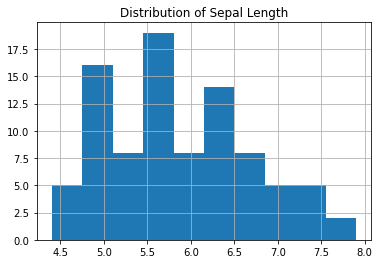

In [89]:
plt.title("Distribution of Sepal Length")
train_iris.sepal_length.hist()
plt.show()

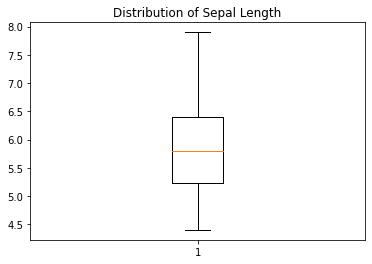

In [90]:
plt.title("Distribution of Sepal Length")
plt.boxplot(train_iris.sepal_length)
plt.show()

In [91]:
train_iris.sepal_length.describe()

count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

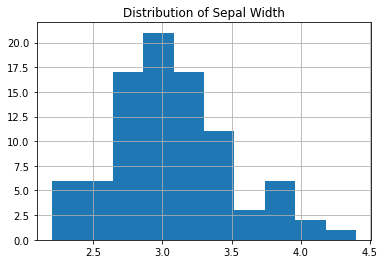

In [92]:
plt.title("Distribution of Sepal Width")
train_iris.sepal_width.hist()
plt.show()

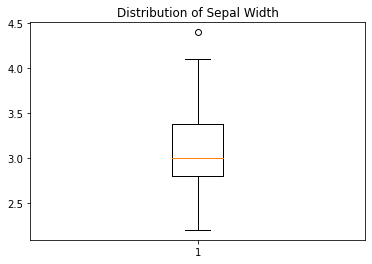

In [93]:
plt.title("Distribution of Sepal Width")
plt.boxplot(train_iris.sepal_width)
plt.show()

In [94]:
train_iris.sepal_width.describe()

count    90.000000
mean      3.070000
std       0.436135
min       2.200000
25%       2.800000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64

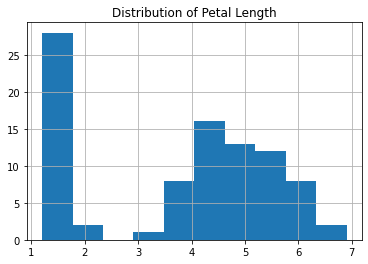

In [95]:
plt.title("Distribution of Petal Length")
train_iris.petal_length.hist()
plt.show()

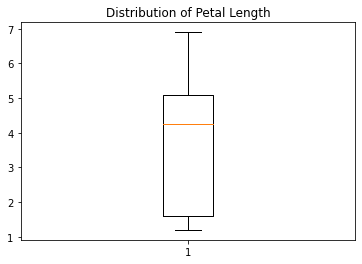

In [96]:
plt.title("Distribution of Petal Length")
plt.boxplot(train_iris.petal_length)
plt.show()

In [97]:
train_iris.petal_length.describe()

count    90.000000
mean      3.782222
std       1.742114
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

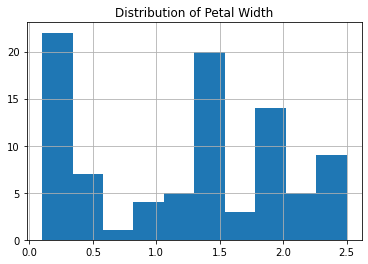

In [98]:
plt.title("Distribution of Petal Width")
train_iris.petal_width.hist()
plt.show()

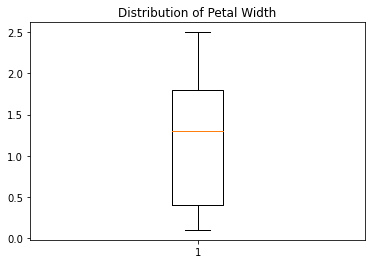

In [99]:
plt.title("Distribution of Petal Width")
plt.boxplot(train_iris.petal_width)
plt.show()

In [100]:
train_iris.petal_width.describe()

count    90.000000
mean      1.203333
std       0.755422
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

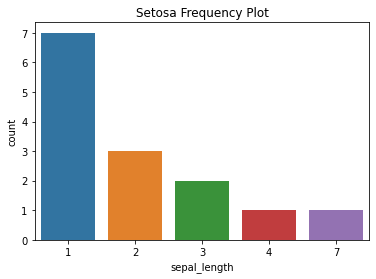

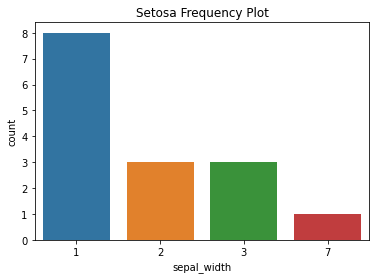

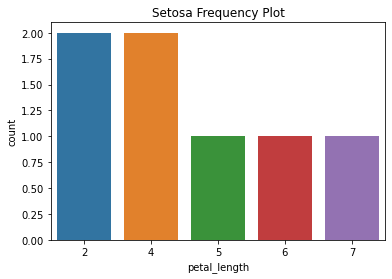

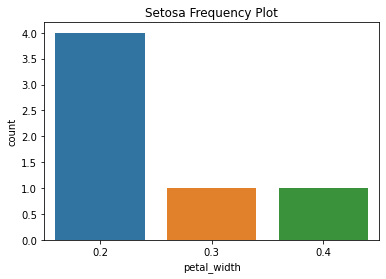

In [101]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

train_iris_setosa = train_iris.loc[train_iris.species=='setosa']
for col in x:
    plt.title('Setosa Frequency Plot')
    sns.countplot(x=train_iris_setosa[col].value_counts(), data=train_iris_setosa[col])
    plt.show()

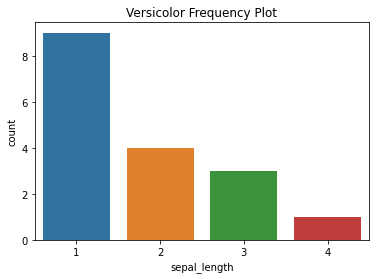

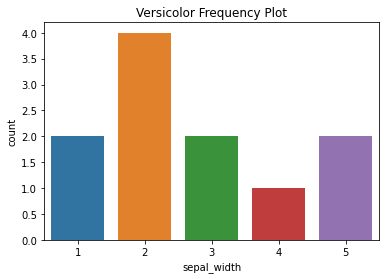

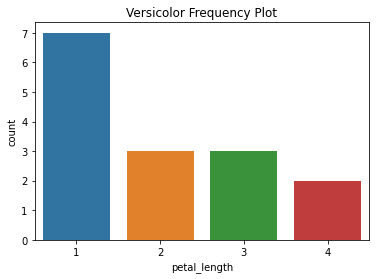

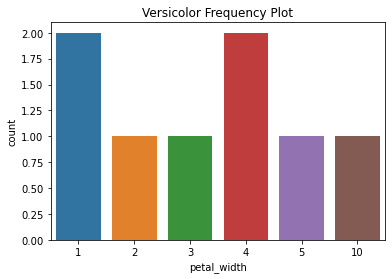

In [102]:
train_iris_versicolor = train_iris.loc[train_iris.species=='versicolor']
for col in x:
    plt.title('Versicolor Frequency Plot')
    sns.countplot(x=train_iris_versicolor[col].value_counts(), data=train_iris_versicolor[col])
    plt.show()

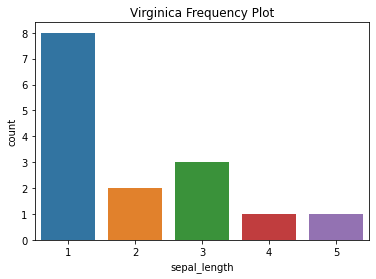

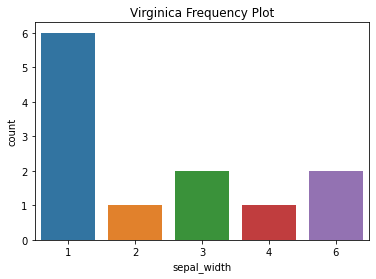

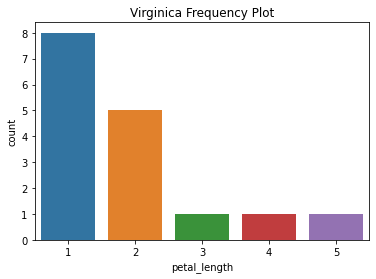

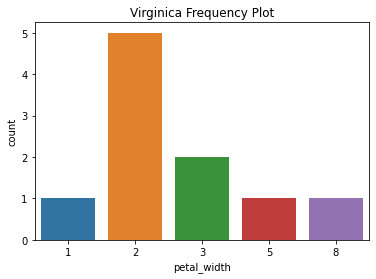

In [103]:
train_iris_virginica = train_iris.loc[train_iris.species=='virginica']
for col in x:
    plt.title('Virginica Frequency Plot')
    sns.countplot(x=train_iris_virginica[col].value_counts(), data=train_iris_virginica[col])
    plt.show()

### Document takeaways & any actions.

- Setosa seems to have an outlier in the sepal width
- Versicolor has a wide range of values for pedal width while Setosa has a very small range for pedal width

## Bivariate Stats

In [104]:
# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, 
# adding a horizontal line showing the overall mean of the metric (y-axis).
train_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
70,versicolor,5.9,3.2,4.8,1.8,0,1,0
123,virginica,6.3,2.7,4.9,1.8,0,0,1
87,versicolor,6.3,2.3,4.4,1.3,0,1,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
15,setosa,5.7,4.4,1.5,0.4,1,0,0


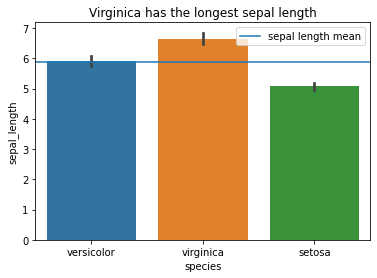

In [105]:
plt.title('Virginica has the longest sepal length')
sns.barplot(x='species', y='sepal_length', data=train_iris)
sepal_length_mean = train_iris.sepal_length.mean()
plt.axhline(sepal_length_mean, label = 'sepal length mean')
plt.legend()

- Virginica has the longest sepal length

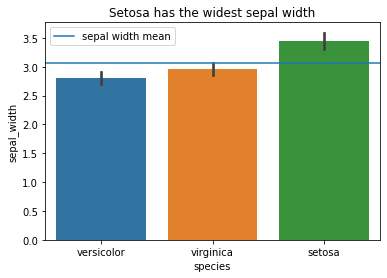

In [106]:
plt.title('Setosa has the widest sepal width')
sns.barplot(x='species', y='sepal_width', data=train_iris)
sepal_width_mean = train_iris.sepal_width.mean()
plt.axhline(sepal_width_mean, label = 'sepal width mean')
plt.legend()

- Setosa has the widest sepal width

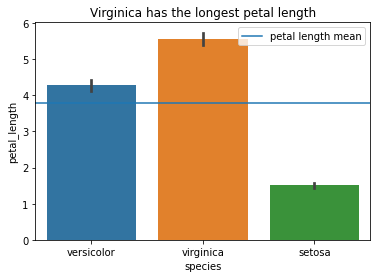

In [107]:
plt.title('Virginica has the longest petal length')
sns.barplot(x='species', y='petal_length', data=train_iris)
petal_length_mean = train_iris.petal_length.mean()
plt.axhline(petal_length_mean, label = 'petal length mean')
plt.legend()

- Virginica has the longest petal length
- Setosa's petal length is quite smaller then the other 2 species 

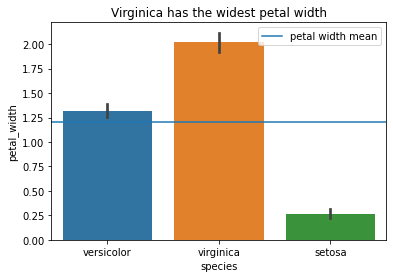

In [108]:
plt.title('Virginica has the widest petal width')
sns.barplot(x='species', y='petal_width', data=train_iris)
petal_width_mean = train_iris.petal_width.mean()
plt.axhline(petal_width_mean, label = 'petal width mean')
plt.legend()

- Virginica has the widest petal width
- Setosa's petal width is quite smaller then the other 2 species

In [109]:
# For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test 
# (scipy.stats.mannwhitneyu) to see if there is a significant difference between 
# the two groups. Do the same for the other measurement types.
alpha = 0.05

corr, p = stats.mannwhitneyu(train_iris_virginica.petal_width, train_iris_versicolor.petal_width)
if p < alpha:
    print('reject the null hypothesis, they are dependent')
else:
    print('fail to reject the null hypothesis, they are independent')

reject the null hypothesis, they are dependent


In [110]:
corr, p = stats.mannwhitneyu(train_iris_virginica.petal_length, train_iris_versicolor.petal_length)
if p < alpha:
    print('reject the null hypothesis, they are dependent')
else:
    print('fail to reject the null hypothesis, they are independent')

reject the null hypothesis, they are dependent


In [111]:
corr, p = stats.mannwhitneyu(train_iris_virginica.sepal_length, train_iris_versicolor.sepal_length)
if p < alpha:
    print('reject the null hypothesis, they are dependent')
else:
    print('fail to reject the null hypothesis, they are independent')

reject the null hypothesis, they are dependent


In [112]:
corr, p = stats.mannwhitneyu(train_iris_virginica.sepal_width, train_iris_versicolor.sepal_width)
if p < alpha:
    print('reject the null hypothesis, they are dependent')
else:
    print('fail to reject the null hypothesis, they are independent')

fail to reject the null hypothesis, they are independent


## Document takeaways & any actions.



- Virginica and Versicolor sepal width are independent of each other
- Virginica and Versicolor sepal legnth, petal width, and petal length are dependent of each other
- Setosa's petal width and length is quite smaller (well below the average) then the other 2 species

## Multivariate Stats



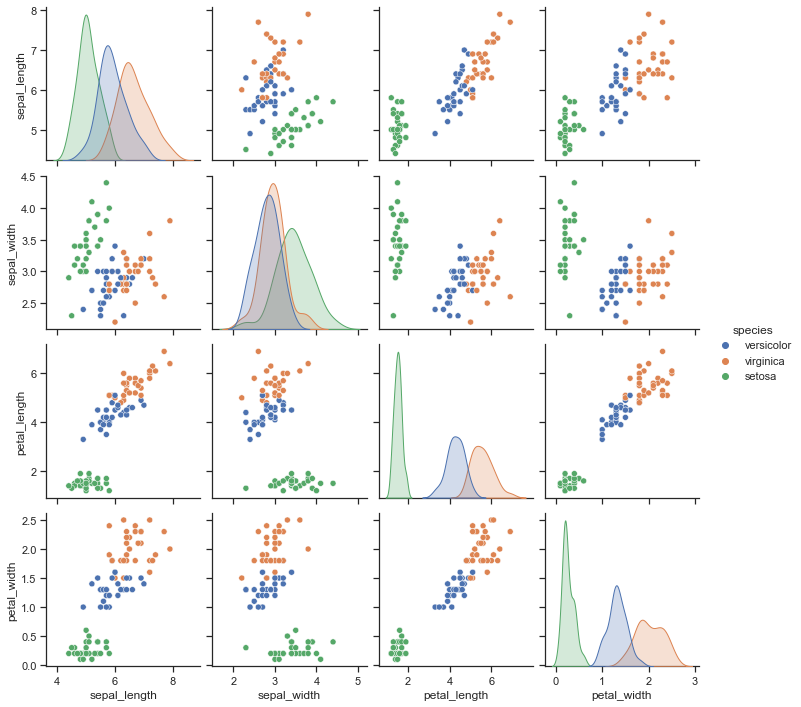

In [116]:
# Visualize the interaction of each measurement type with the others using a pairplot 
# (or scatter matrix or something similar) and add color to represent species.

cols_to_drop = ['species_setosa', 'species_versicolor', 'species_virginica']
train_iris_scatter = train_iris.drop(columns=cols_to_drop)
sns.set_theme(style="ticks")
sns.pairplot(train_iris_scatter, hue="species")

In [114]:
# Visualize two numeric variables by means of the species. 
# Hint: sns.relplot with hue or col

In [121]:
# Create a swarmplot using a melted dataframe of all your numeric variables. 
# The x-axis should be the variable name, the y-axis the measure. 
# Add another dimension using color to represent species. 
# Document takeaways from this visualization.

cols_to_drop = ['species_setosa', 'species_versicolor', 'species_virginica']
train_iris_melt = train_iris.drop(columns=cols_to_drop)
train_iris_melt = train_iris_melt.melt(id_vars='species')
train_iris_melt

,species,variable,value
0,versicolor,sepal_length,5.9
1,virginica,sepal_length,6.3
2,versicolor,sepal_length,6.3
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.7
...,...,...,...
355,setosa,petal_width,0.2
356,setosa,petal_width,0.2
357,versicolor,petal_width,1.3
358,setosa,petal_width,0.4


<AxesSubplot:xlabel='variable', ylabel='value'>

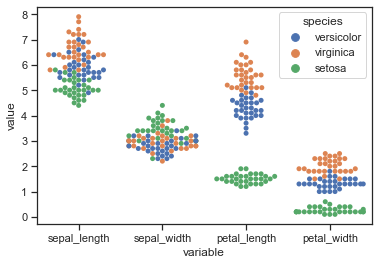

In [122]:
sns.swarmplot(x="variable", y="value", hue='species', data=train_iris_melt)


## Document takeaways and any actions.



- Versicolor and Virginica seem to have more similar numeric variables, while Setosa is more seperated
- Sepal Width has the least variance between the data points, this would make it a poor choice to catagorize it by.

# Part II


## Explore your titanic dataset more completely.
- Determine drivers of the target variable
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.


In [136]:
# Might be able to bin the fare column, however further testing is needed to be sure.

In [125]:
titanic_df = prep_titanic(titanic_df)
train_titanic, validate_titanic, test_titanic = split_data_titanic(titanic_df)
train_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,male,0,0,7.8958,Cherbourg,1,1,0,0
380,380,1,1,female,0,0,227.5250,Cherbourg,1,0,0,0
492,492,0,1,male,0,0,30.5000,Southampton,1,1,0,1
55,55,1,1,male,0,0,35.5000,Southampton,1,1,0,1
243,243,0,3,male,0,0,7.1250,Southampton,1,1,0,1


survived
0    329
1    205
Name: survived, dtype: int64
0    61.610487
1    38.389513
Name: survived, dtype: float64


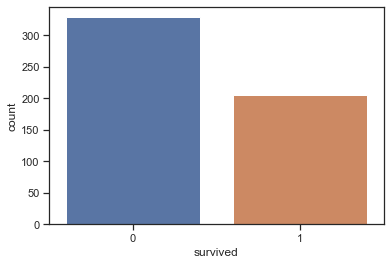

pclass
3    295
1    122
2    117
Name: pclass, dtype: int64
3    55.243446
1    22.846442
2    21.910112
Name: pclass, dtype: float64


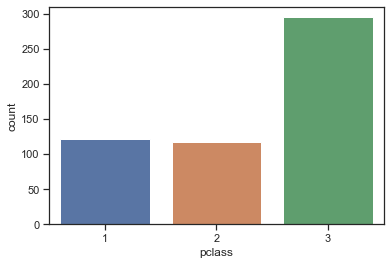

sex_male
1    348
0    186
Name: sex_male, dtype: int64
1    65.168539
0    34.831461
Name: sex_male, dtype: float64


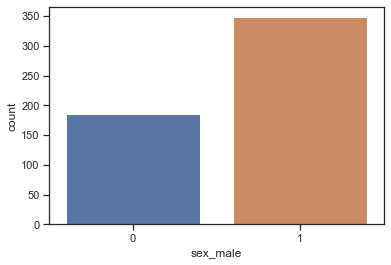

sibsp
0    378
1    106
2     22
3     10
4     10
8      5
5      3
Name: sibsp, dtype: int64
0    70.786517
1    19.850187
2     4.119850
3     1.872659
4     1.872659
8     0.936330
5     0.561798
Name: sibsp, dtype: float64


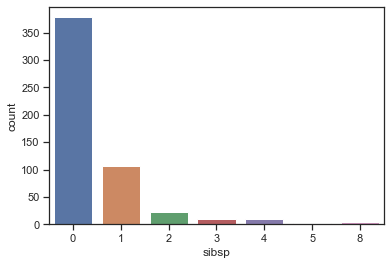

parch
0    414
1     67
2     45
3      4
5      3
4      1
Name: parch, dtype: int64
0    77.528090
1    12.546816
2     8.426966
3     0.749064
5     0.561798
4     0.187266
Name: parch, dtype: float64


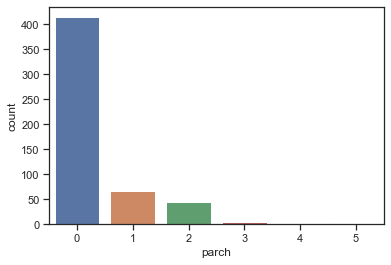

alone
1    335
0    199
Name: alone, dtype: int64
1    62.734082
0    37.265918
Name: alone, dtype: float64


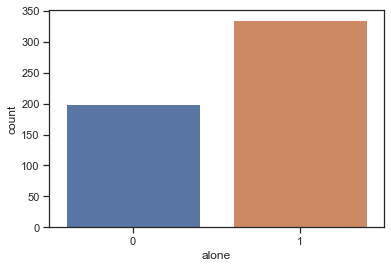

embark_town_Queenstown
0    488
1     46
Name: embark_town_Queenstown, dtype: int64
0    91.385768
1     8.614232
Name: embark_town_Queenstown, dtype: float64


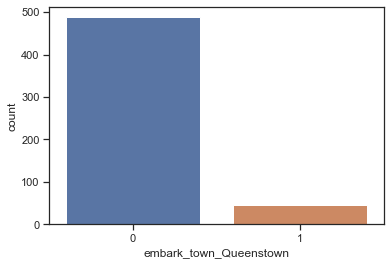

embark_town_Southampton
1    381
0    153
Name: embark_town_Southampton, dtype: int64
1    71.348315
0    28.651685
Name: embark_town_Southampton, dtype: float64


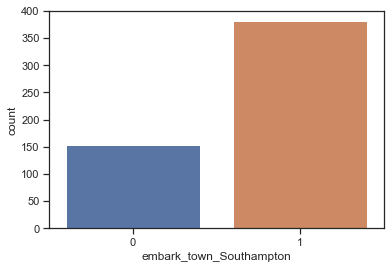

In [126]:
# Determine drivers of the target variable

num_vars = ['fare']
cat_vars = ['survived', 'pclass', 'sex_male', 'sibsp', 'parch', 'alone',
            'embark_town_Queenstown', 'embark_town_Southampton']
for col in cat_vars:
    print(col)
    print(train_titanic[col].value_counts())
    print(train_titanic[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train_titanic)
    plt.show()

<AxesSubplot:>

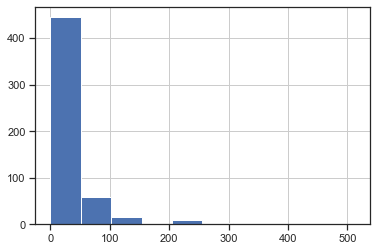

In [127]:
train_titanic.fare.hist()


<AxesSubplot:xlabel='fare'>

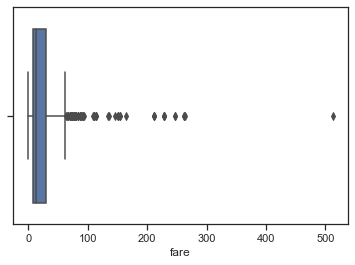

In [128]:
sns.boxplot(x='fare', data=train_titanic)


In [130]:
cols_to_drop = ['passenger_id', 'sex']
train_titanic = train_titanic.drop(columns=cols_to_drop)

In [131]:
train_titanic.head()

,survived,pclass,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,0,0,7.8958,Cherbourg,1,1,0,0
380,1,1,0,0,227.5250,Cherbourg,1,0,0,0
492,0,1,0,0,30.5000,Southampton,1,1,0,1
55,1,1,0,0,35.5000,Southampton,1,1,0,1
243,0,3,0,0,7.1250,Southampton,1,1,0,1


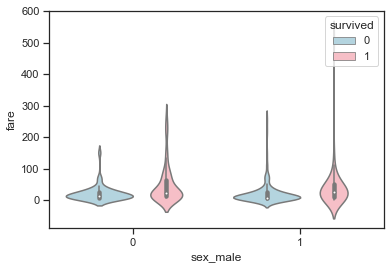

In [140]:
sns.violinplot("sex_male", "fare", hue='survived', data=train_titanic,
               palette=["lightblue", "lightpink"]);

In [134]:
def cat_vis(train_titanic, col):
    plt.title('Relationship of survival rate and '+col)
    sns.barplot(x=col, y='survived', data=train_titanic)
    survival_rate = train_titanic.survived.mean()
    plt.axhline(survival_rate, label='survival rate')
    plt.legend()
    plt.show()
    
    
def cat_test(train_titanic, col):
    alpha = 0.05
    null_hyp = col+' and survival rate are independent'
    alt_hyp = 'There is a relationship between survival rate and '+col
    observed = pd.crosstab(train_titanic.survived, train_titanic[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between survival rate and '+col)

def cat_analysis(train_titanic, col):
    cat_vis(train_titanic, col)
    cat_test(train_titanic, col)

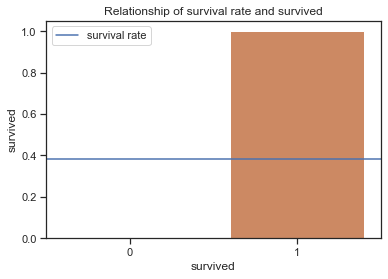

We reject the null hypothesis that survived and survival rate are independent
There is a relationship between survival rate and survived


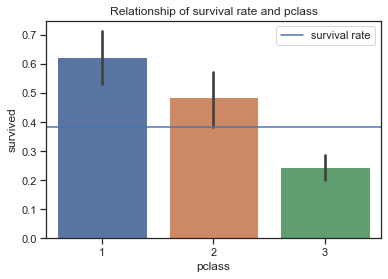

We reject the null hypothesis that pclass and survival rate are independent
There is a relationship between survival rate and pclass


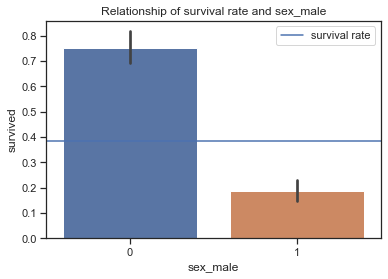

We reject the null hypothesis that sex_male and survival rate are independent
There is a relationship between survival rate and sex_male


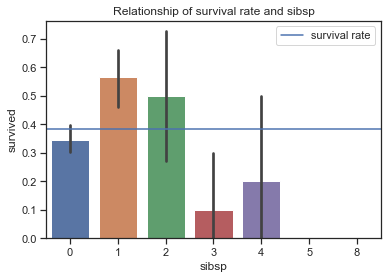

We reject the null hypothesis that sibsp and survival rate are independent
There is a relationship between survival rate and sibsp


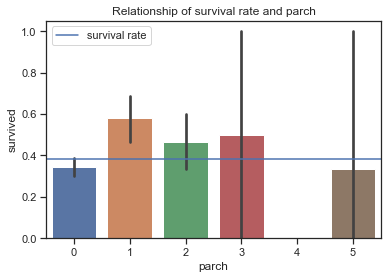

We reject the null hypothesis that parch and survival rate are independent
There is a relationship between survival rate and parch


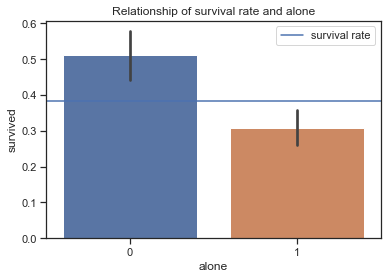

We reject the null hypothesis that alone and survival rate are independent
There is a relationship between survival rate and alone


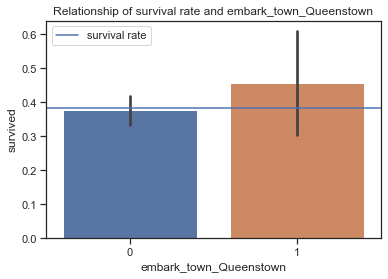

We fail to reject the null hypothesis that embark_town_Queenstown and survival rate are independent
There appears to be no relationship between survival rate and embark_town_Queenstown


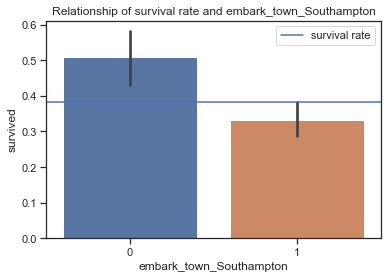

We reject the null hypothesis that embark_town_Southampton and survival rate are independent
There is a relationship between survival rate and embark_town_Southampton


In [135]:
for col in cat_vars:
    cat_analysis(train_titanic, col)

- Embarking from a place other than southampton is more likely to survive.
- Traveling alone is less likely to survive
- It appears traveling with 3+ have lower survival rate
- Females more likely to survive
- third class less likely to survive
- there is an outlier in the fare column, around 500+

# Part III


- Explore your telco data to discover drivers of churn
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.
